In [2]:
import numpy as np
import pandas as pd
import plots
plots.use_JHU_github_live_data()

In [3]:
country_list = ["US","Canada","Israel","Italy","Spain","Sweden","United Kingdom"]

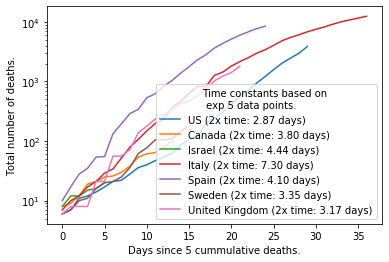

In [5]:
plots.semilog_deaths_since(country_list,
                          threshold_num_cases=5,
                          time_constant_type=2,
                          fit_length_constant=5,
                          fit_type="exp")

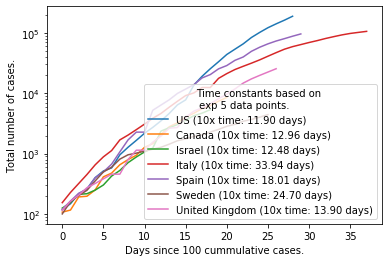

In [6]:
plots.semilog_cases_since(country_list,
                          threshold_num_cases=100,
                          time_constant_type=10,
                          fit_length_constant=5,
                          fit_type="exp")

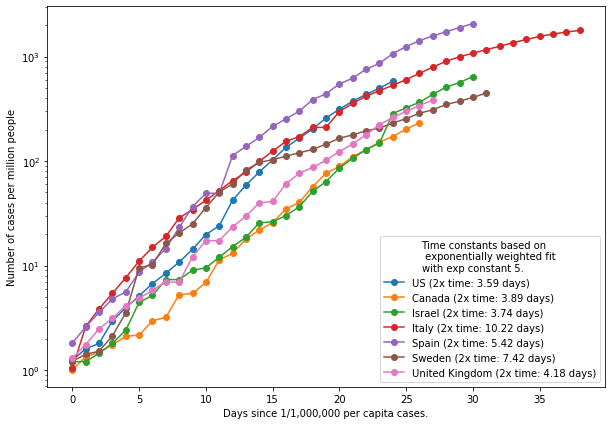

In [7]:
plots.semilog_cases_per_capita_since(country_list,
                          threshold_per_capita=1,
                          time_constant_type=2,
                          fit_length_constant=5,
                          fit_type="exp")

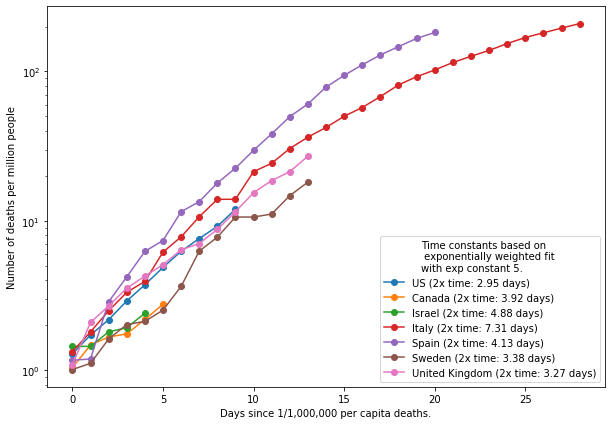

In [8]:
plots.semilog_deaths_per_capita_since(country_list,
                          threshold_per_capita=1,
                          time_constant_type=2,
                          fit_length_constant=5,
                          fit_type="exp")

A total of 180 countries confirmed at least one case of covid-19
Mean death rate for US: 0.0262 (+-0.0172 std)
Mean death rate for Canada: 0.0104 (+-0.0028 std)
Mean death rate for Israel: 0.0026 (+-0.0011 std)
Mean death rate for Italy: 0.0637 (+-0.0313 std)
Mean death rate for Spain: 0.0454 (+-0.0264 std)
Mean death rate for Sweden: 0.0152 (+-0.0130 std)
Mean death rate for United Kingdom: 0.0348 (+-0.0200 std)


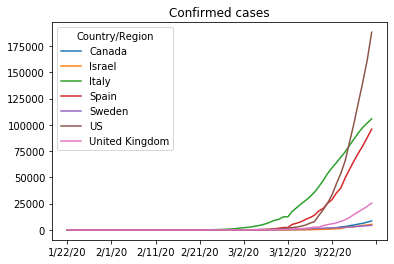

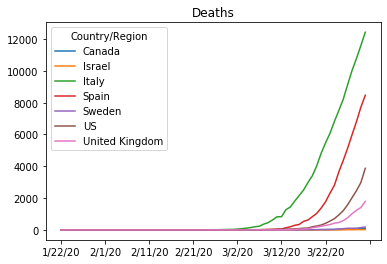

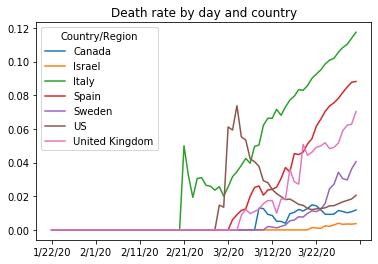

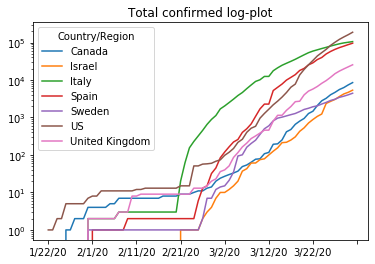

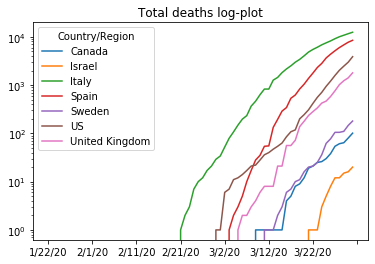

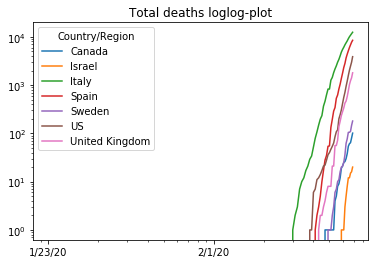

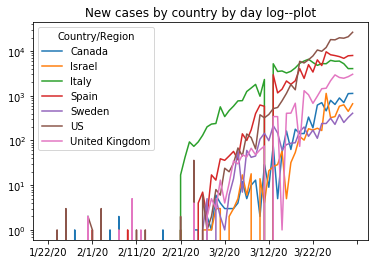

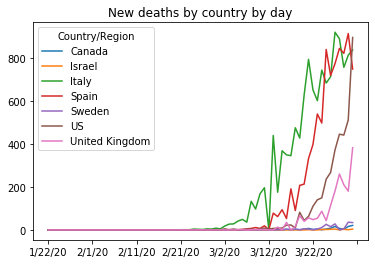

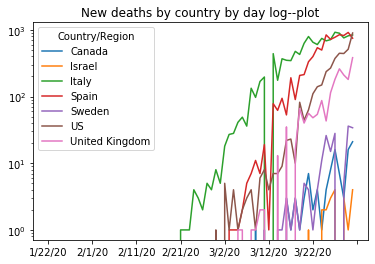

In [9]:
plots.generate_all_plots(country_list)